In [229]:
# IMPORT REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [230]:
# LOAD THE DATASET

df = pd.read_csv('MTA_Daily_Ridership.csv')
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,01/03/2020,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,02/03/2020,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,03/03/2020,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,04/03/2020,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,05/03/2020,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


## DATA CLEANING AND PREPROCESSING

In [231]:
# SHAPE
print(f"Shape of Data: {df.shape}")
print("-------------------------------------------------------------------------------------------------------------------------------------")
# COLUMN NAMES
print(f"Column Names: {df.columns.tolist()}")
print("-------------------------------------------------------------------------------------------------------------------------------------")
# DATA TYPES
print(f"Data Types: {df.dtypes}")
print("-------------------------------------------------------------------------------------------------------------------------------------")
# CHECK NULL VALUES
print(f"Null Values: {df.isnull().sum()}")
print("-------------------------------------------------------------------------------------------------------------------------------------")

# CHECK FOR DUPLICATES
duplicates = df.duplicated().sum()
print(f"Duplicate Values: {duplicates}")
print("-------------------------------------------------------------------------------------------------------------------------------------")

# CHECK FOR INVALID/ZERO/NEGATIVE VALUES
if 'Ridership' in df.columns:
    invalid_ridership = df[(df['ridership'] <= 0)]
    print(f"Invalid Ridership Columns\n: {invalid_ridership}")
print("-------------------------------------------------------------------------------------------------------------------------------------")

# CREATING NEW COLUMNS (DAY,MONTH,YEAR)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)  # Convert to datetime
    df['Month'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df['Day of Week'] = df['Date'].dt.day_name()
print("-------------------------------------------------------------------------------------------------------------------------------------")

# RENAMING THE COLUMNS
df.rename(columns={
    'Date': 'date',
    'Subways: Total Estimated Ridership': 'subway',
    'Subways: % of Comparable Pre-Pandemic Day': 'subway_%_pre_covid',
    'Buses: Total Estimated Ridership': 'bus',
    'Buses: % of Comparable Pre-Pandemic Day': 'bus_%_pre_covid',
    'LIRR: Total Estimated Ridership': 'lirr',
    'LIRR: % of Comparable Pre-Pandemic Day': 'lirr_%_pre_covid',
    'Metro-North: Total Estimated Ridership': 'metro',
    'Metro-North: % of Comparable Pre-Pandemic Day': 'metro_%_pre_covid',
    'Access-A-Ride: Total Scheduled Trips': 'access',
    'Access-A-Ride: % of Comparable Pre-Pandemic Day': 'access_%_pre_covid',
    'Bridges and Tunnels: Total Traffic': 'bridge_tunnel',
    'Bridges and Tunnels: % of Comparable Pre-Pandemic Day': 'bridge_tunnel_%_pre_covid',
    'Staten Island Railway: Total Estimated Ridership': 'sir',
    'Staten Island Railway: % of Comparable Pre-Pandemic Day': 'sir_%_pre_covid',
    'Month': 'month',
    'Year': 'year',
    'Day of Week': 'weekday'
}, inplace=True)
print("-------------------------------------------------------------------------------------------------------------------------------------")

# ADDING CALCULATED COLUMNS
df['total_ridership'] = df[['subway', 'bus', 'lirr', 'metro', 'sir', 'access']].sum(axis=1)
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
print("-------------------------------------------------------------------------------------------------------------------------------------")

# MODIFIED DATAFRAME
print(f"Modified DataFrame:\n")
df.head()

Shape of Data: (1706, 15)
-------------------------------------------------------------------------------------------------------------------------------------
Column Names: ['Date', 'Subways: Total Estimated Ridership', 'Subways: % of Comparable Pre-Pandemic Day', 'Buses: Total Estimated Ridership', 'Buses: % of Comparable Pre-Pandemic Day', 'LIRR: Total Estimated Ridership', 'LIRR: % of Comparable Pre-Pandemic Day', 'Metro-North: Total Estimated Ridership', 'Metro-North: % of Comparable Pre-Pandemic Day', 'Access-A-Ride: Total Scheduled Trips', 'Access-A-Ride: % of Comparable Pre-Pandemic Day', 'Bridges and Tunnels: Total Traffic', 'Bridges and Tunnels: % of Comparable Pre-Pandemic Day', 'Staten Island Railway: Total Estimated Ridership', 'Staten Island Railway: % of Comparable Pre-Pandemic Day']
-------------------------------------------------------------------------------------------------------------------------------------
Data Types: Date                                        

,date,subway,subway_%_pre_covid,bus,bus_%_pre_covid,lirr,lirr_%_pre_covid,metro,metro_%_pre_covid,access,access_%_pre_covid,bridge_tunnel,bridge_tunnel_%_pre_covid,sir,sir_%_pre_covid,month,year,weekday,total_ridership,is_weekend
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,March,2020,Sunday,3362046,True
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,March,2020,Monday,8088729,False
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,March,2020,Tuesday,8270306,False
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,March,2020,Wednesday,8231758,False
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,March,2020,Thursday,8293363,False


## Analyze the recovery trend of each transit mode post-COVID

### Phase 1: Year-wise Recovery Trend

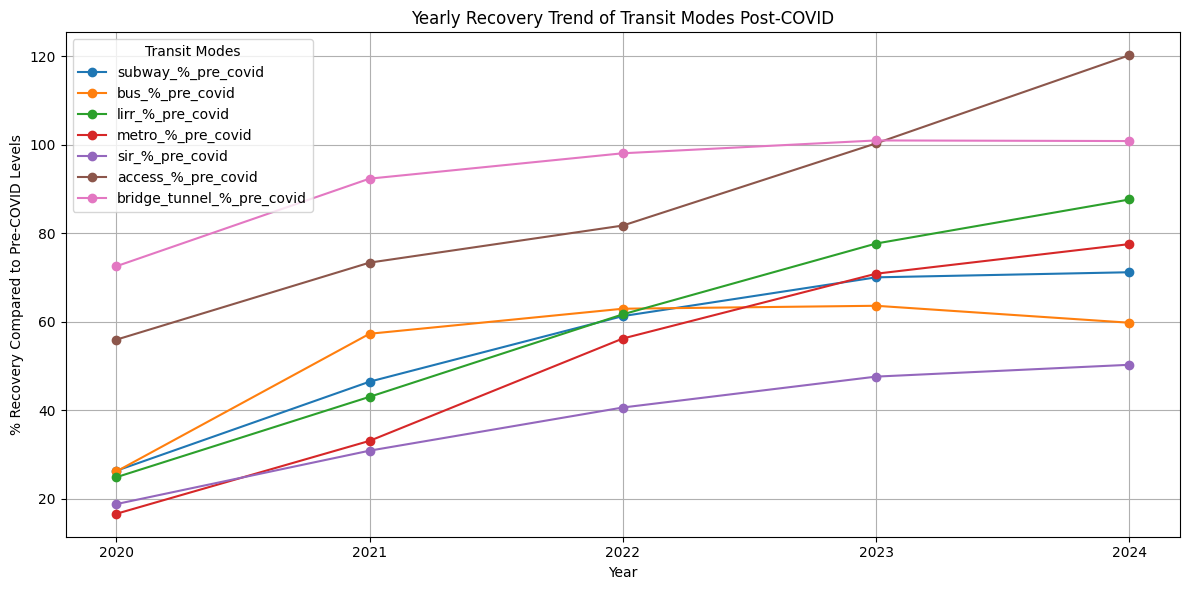

In [232]:
# IDENTIFY COLUMNS FOR RECOVERY %
required_columns = [
    'subway_%_pre_covid',
    'bus_%_pre_covid',
    'lirr_%_pre_covid',
    'metro_%_pre_covid',
    'sir_%_pre_covid',
    'access_%_pre_covid',
    'bridge_tunnel_%_pre_covid'
]

# GROUP BY YEAR
yearly_recovery = df.groupby('year')[required_columns].mean().reset_index()
# mean has already calculated

# CREATE LINE PLOT
plt.figure(figsize=(12, 6))

# Plot each mode with different colors and markers
for column in required_columns:
    plt.plot(yearly_recovery['year'], yearly_recovery[column], marker='o', label=column)

# Add title and labels
plt.title('Yearly Recovery Trend of Transit Modes Post-COVID')
plt.xlabel('Year')
plt.ylabel('% Recovery Compared to Pre-COVID Levels')
plt.xticks(yearly_recovery['year'])  # Ensure all years are shown on the x-axis
plt.legend(title='Transit Modes')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

### Phase 2: Month-wise Subway vs Bus Recovery Trend

In [233]:
import pandas as pd
import plotly.express as px

# Ensure logical month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Group by year and month
monthly_recovery = df.groupby(['year', 'month'])[['subway_%_pre_covid', 'bus_%_pre_covid']].mean().reset_index()

# Prepare pivot table for Subway
subway_pivot = monthly_recovery.pivot(index='year', columns='month', values='subway_%_pre_covid')[month_order]

# Format the float values as strings with % sign
# for 0%
#subway_text = subway_pivot.fillna(0).round(0).astype(int).astype(str) + '%'
# for blank
subway_text = subway_pivot.applymap(lambda x: f"{x:.1f}%" if pd.notna(x) else "")


# Plot Subway heatmap
fig1 = px.imshow(
    subway_pivot,
    labels=dict(x="Month", y="Year", color="Subway Recovery %"),
    x=month_order,
    y=sorted(df['year'].unique()),
    color_continuous_scale="Blues"
)

# Add formatted text and adjust font size
fig1.update_traces(
    text=subway_text.values,
    texttemplate="%{text}",
    textfont=dict(size=14)
)

fig1.update_layout(title="Subway Recovery % Heatmap")

# Same steps for Bus
bus_pivot = monthly_recovery.pivot(index='year', columns='month', values='bus_%_pre_covid')[month_order]
# for 0%
#bus_text = bus_pivot.fillna(0).round(0).astype(int).astype(str) + '%'
# for blank
bus_text = bus_pivot.applymap(lambda x: f"{x:.1f}%" if pd.notna(x) else "")


fig2 = px.imshow(
    bus_pivot,
    labels=dict(x="Month", y="Year", color="Bus Recovery %"),
    x=month_order,
    y=sorted(df['year'].unique()),
    color_continuous_scale="Oranges"
)

fig2.update_traces(
    text=bus_text.values,
    texttemplate="%{text}",
    textfont=dict(size=14)
)

fig2.update_layout(title="Bus Recovery % Heatmap")

# Show both
fig1.show()
fig2.show()

## Mode-wise Deep Analysis

### Phase 1: Mode-wise % Recovery Trend (Weekday vs Weekend)

In [234]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Step 1: Map day_type to Weekday/Weekend
df['day_type_simple'] = df['weekday'].map(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Step 2: Convert month names to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month'] = df['month'].map(month_mapping)

# Step 3: Transit modes to plot
modes = [
    'subway_%_pre_covid', 'bus_%_pre_covid', 'lirr_%_pre_covid',
    'metro_%_pre_covid', 'sir_%_pre_covid', 'access_%_pre_covid'
]

# Step 4: Create subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=[
    mode.replace('_', ' ').title() + ' Recovery Trend' for mode in modes
])

# Step 5: Plot each mode in subplot
for i, mode in enumerate(modes):
    row = i // 3 + 1
    col = i % 3 + 1

    # Grouping
    temp = df.groupby(['year', 'month', 'day_type_simple'])[mode].mean().reset_index()
    temp['Period'] = pd.to_datetime(temp[['year', 'month']].assign(day=1))

    # Weekday Line
    weekday_data = temp[temp['day_type_simple'] == 'Weekday']
    fig.add_trace(
        go.Scatter(
            x=weekday_data['Period'],
            y=weekday_data[mode],
            mode='lines+markers',
            name='Weekday',
            line=dict(color='steelblue'),
            showlegend=(i == 0)
        ),
        row=row, col=col
    )

    # Weekend Line
    weekend_data = temp[temp['day_type_simple'] == 'Weekend']
    fig.add_trace(
        go.Scatter(
            x=weekend_data['Period'],
            y=weekend_data[mode],
            mode='lines+markers',
            name='Weekend',
            line=dict(color='darkorange'),
            showlegend=(i == 0)
        ),
        row=row, col=col
    )

# Step 6: Update layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Transit % Pre-COVID Recovery Trends (Weekday vs Weekend)",
    title_x=0.5,
    legend=dict(x=1, y=1),
    template='plotly_white'
)

# Y-axis label
fig.update_yaxes(title_text='% of Pre-COVID', row=1, col=1)
fig.update_xaxes(title_text='Month-Year')

fig.show()



### Phase 2: Stacked Area Chart – % Recovery Across All Modes

<Figure size 1400x600 with 0 Axes>

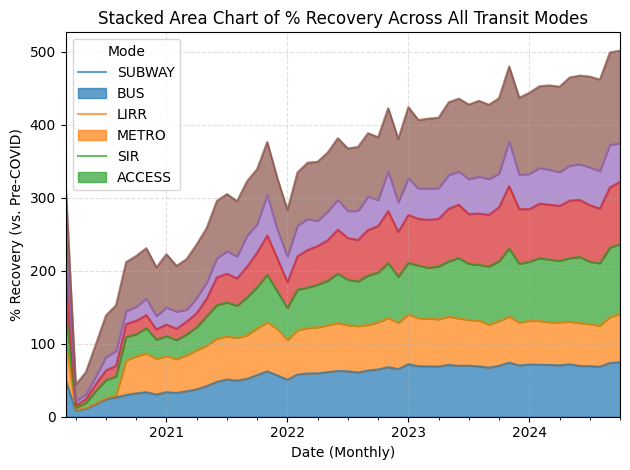

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year and month from the existing 'date' column
df['date'] = pd.to_datetime(df['date'])  # Make sure it's datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new 'month_start' column to group by month
df['month_start'] = df['date'].dt.to_period('M').dt.to_timestamp()

# List of mode columns
mode_columns = [
    'subway_%_pre_covid', 'bus_%_pre_covid', 'lirr_%_pre_covid',
    'metro_%_pre_covid', 'sir_%_pre_covid', 'access_%_pre_covid'
]

# Group by month_start and average
df_grouped = df.groupby('month_start')[mode_columns].mean()

# Plot
plt.figure(figsize=(14, 6))
ax = df_grouped.plot.area(stacked=True, alpha=0.7)

plt.title("Stacked Area Chart of % Recovery Across All Transit Modes")
plt.ylabel("% Recovery (vs. Pre-COVID)")
plt.xlabel("Date (Monthly)")
plt.legend([col.replace('_%_pre_covid', '').upper() for col in mode_columns], title="Mode")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



## Exploring Mode Relationships & Unusual Patterns

### Phase 3: Correlation Between Modes

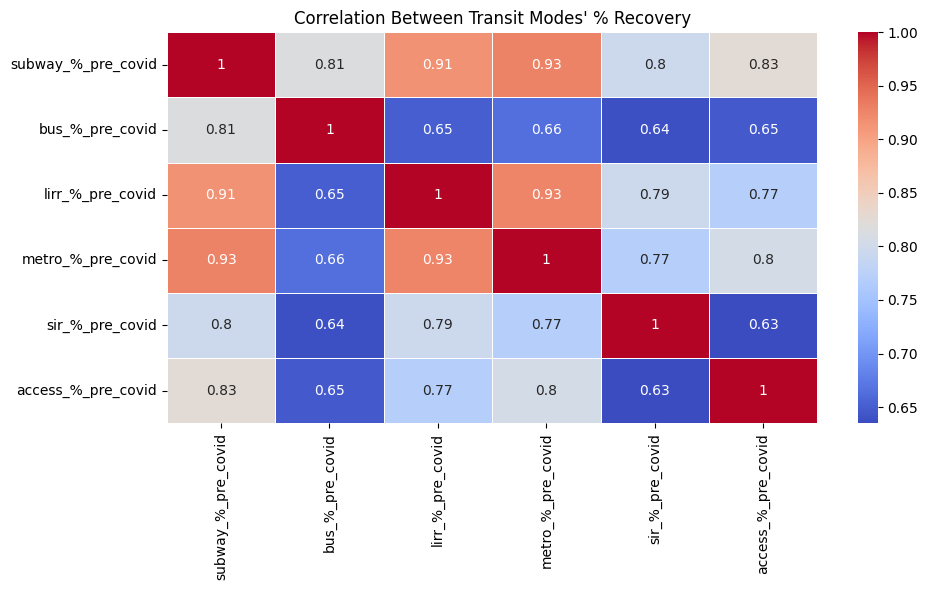

In [236]:
# Select only % recovery columns
mode_columns = [
    'subway_%_pre_covid', 'bus_%_pre_covid', 'lirr_%_pre_covid',
    'metro_%_pre_covid', 'sir_%_pre_covid', 'access_%_pre_covid'
]

# Compute correlation matrix
correlation_matrix = df[mode_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Transit Modes' % Recovery")
plt.tight_layout()
plt.show()

### Phase 2: Outlier Detection Using IQR 

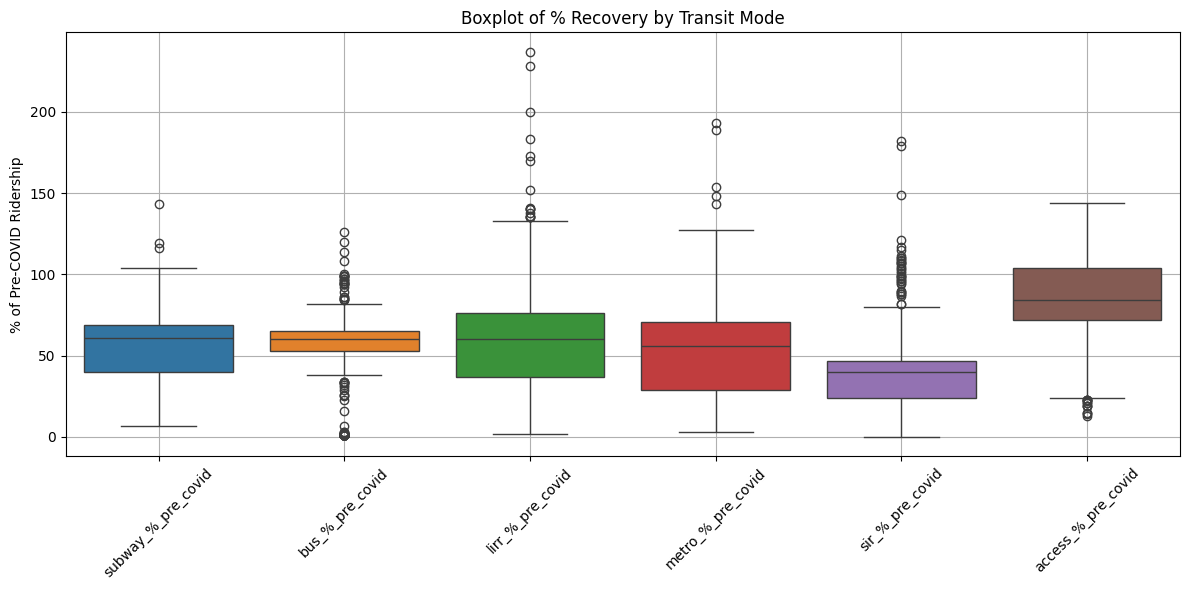

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[
    'subway_%_pre_covid',
    'bus_%_pre_covid',
    'lirr_%_pre_covid',
    'metro_%_pre_covid',
    'sir_%_pre_covid',
    'access_%_pre_covid'
]])
plt.title("Boxplot of % Recovery by Transit Mode")
plt.ylabel("% of Pre-COVID Ridership")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



## Statistical Analysis on Ridership Percentages

### Phase 1: Descriptive Statistics on % Recovery

In [238]:
# Corrected list of % columns
percentage_cols = [
    'subway_%_pre_covid',
    'bus_%_pre_covid',
    'lirr_%_pre_covid',
    'metro_%_pre_covid',
    'access_%_pre_covid',
    'bridge_tunnel_%_pre_covid',
    'sir_%_pre_covid'
]

# Descriptive statistics
stats_df = df[percentage_cols].describe().T[['mean', '50%', 'std', 'min', 'max']]
stats_df.rename(columns={'50%': 'median'}, inplace=True)

# Displaying results nicely
print("Descriptive Statistics of Ridership Recovery Percentages:")
display(stats_df.style.background_gradient(cmap='Blues'))



Descriptive Statistics of Ridership Recovery Percentages:


,mean,median,std,min,max
subway_%_pre_covid,55.461313,61.000000,19.819596,7.000000,143.000000
bus_%_pre_covid,54.692849,60.000000,19.293307,1.000000,126.000000
lirr_%_pre_covid,59.128370,60.000000,29.297993,2.000000,237.000000
metro_%_pre_covid,51.083236,56.000000,26.137311,3.000000,193.000000
access_%_pre_covid,86.165299,84.000000,24.645063,13.000000,144.000000
bridge_tunnel_%_pre_covid,93.375147,97.000000,14.641962,18.000000,120.000000
sir_%_pre_covid,37.811254,40.000000,19.273205,0.000000,182.000000


### Phase 2: Hypothesis Testing

In [242]:
import pandas as pd
from scipy import stats

# List of all modes
modes = [
    'subway_%_pre_covid',
    'bus_%_pre_covid',
    'lirr_%_pre_covid',
    'metro_%_pre_covid',
    'access_%_pre_covid',
    'bridge_tunnel_%_pre_covid',
    'sir_%_pre_covid'
]

# Loop through each mode independently
for mode in modes:
    data = df[mode].dropna()  # Drop NaNs for this specific mode
    print(f"=== {mode.replace('_%_pre_covid', '').title()} ===")
    
    if len(data) == 0:
        print("No data available.\n")
        continue  # Skip this mode if no data is available

    t_stat, p_val = stats.ttest_1samp(data, popmean=75, alternative='greater')
    print(f"Mean % Recovery: {data.mean():.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Reject H₀ → Recovery is significantly above 75%\n")
    else:
        print("Fail to Reject H₀ → Recovery is not significantly above 75%\n")



=== Subway ===
Mean % Recovery: 55.46
T-statistic: -40.7183
P-value: 1.0000
Fail to Reject H₀ → Recovery is not significantly above 75%

=== Bus ===
Mean % Recovery: 54.69
T-statistic: -43.4742
P-value: 1.0000
Fail to Reject H₀ → Recovery is not significantly above 75%

=== Lirr ===
Mean % Recovery: 59.13
T-statistic: -22.3755
P-value: 1.0000
Fail to Reject H₀ → Recovery is not significantly above 75%

=== Metro ===
Mean % Recovery: 51.08
T-statistic: -37.7947
P-value: 1.0000
Fail to Reject H₀ → Recovery is not significantly above 75%

=== Access ===
Mean % Recovery: 86.17
T-statistic: 18.7124
P-value: 0.0000
Reject H₀ → Recovery is significantly above 75%

=== Bridge_Tunnel ===
Mean % Recovery: 93.38
T-statistic: 51.8348
P-value: 0.0000
Reject H₀ → Recovery is significantly above 75%

=== Sir ===
Mean % Recovery: 37.81
T-statistic: -79.6979
P-value: 1.0000
Fail to Reject H₀ → Recovery is not significantly above 75%

